In [2]:
import pandas as pd

In [7]:
! ls data

USDT_BTC.csv  USDT_ETH.csv


In [ ]:
! mkdir data/ticker_data

In [74]:
! mv data/USDT_BTC.csv data/ticker_data/
! mv data/USDT_ETH.csv data/ticker_data/

mv: cannot stat 'data/USDT_BTC.csv': No such file or directory
mv: cannot stat 'data/USDT_ETH.csv': No such file or directory


In [77]:
! ls -hl data/ticker_data/

total 39M
-rw-r--r-- 1 jeroens wheel 22M Jun 16 12:04 USDT_BTC.csv
-rw-r--r-- 1 jeroens wheel 17M Jun 16 12:04 USDT_ETH.csv


In [22]:
eth = pd.read_csv("data/USDT_ETH.csv",index_col=0)
btc = pd.read_csv("data/USDT_BTC.csv",index_col=0)

In [26]:
eth.describe()

,Close,Timestamp,High,Low,Open
count,300430.000000,3.004300e+05,300430.000000,300430.000000,300430.000000
mean,197.670922,1.484079e+09,198.200154,197.117508,197.682536
std,289.994048,2.601804e+07,290.810324,289.127702,290.009566
min,0.005000,1.439014e+09,0.005000,0.005000,0.005000
25%,8.700000,1.461547e+09,8.703801,8.685137,8.700000
50%,13.171000,1.484079e+09,13.183231,13.160016,13.170573
75%,307.001065,1.506611e+09,307.799997,306.400000,307.010000
max,1422.470000,1.529143e+09,1424.000000,1417.000000,1421.215464


In [39]:
from datetime import datetime

btc_min_time = datetime.fromtimestamp(btc.describe().loc["min","Timestamp"])\
                        .strftime('%Y-%m-%d %H:%M:%S')


eth_min_time = datetime.fromtimestamp(eth.describe().loc["min","Timestamp"])\
                        .strftime('%Y-%m-%d %H:%M:%S')


print("btc min timestamp " + str(btc_min_time))
print("eth min timestamp " + str(eth_min_time))

btc min timestamp 2015-02-19 21:10:00
eth min timestamp 2015-08-08 08:15:00


In [50]:
eth["datetime"] = pd.to_datetime(eth['Timestamp'],unit='s')
btc["datetime"] = pd.to_datetime(btc['Timestamp'],unit='s')

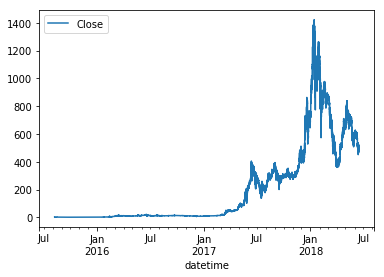

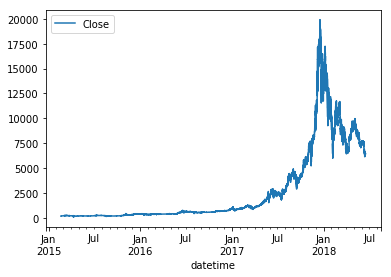

In [60]:
%matplotlib inline

eth.plot.line(x="datetime",y="Close")
btc.plot.line(x="datetime",y="Close")

In [68]:
eth.dtypes

Close               float64
Timestamp             int64
High                float64
Low                 float64
Open                float64
datetime     datetime64[ns]
dtype: object

/home/jeroens/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: invalid type promotion

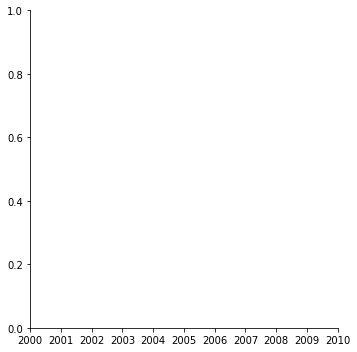

In [70]:
import seaborn as sns
from pandas.tseries import converter
converter.register()

sns.lmplot(x="datetime",y="Close",data=eth,lowess=True)